### RelationGradP
圧力勾配とdepressionの関係を探る

In [2]:
import MDUS
from MDUS import Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

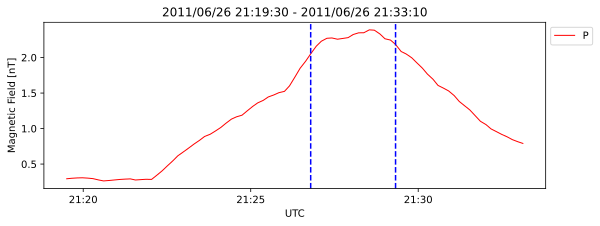

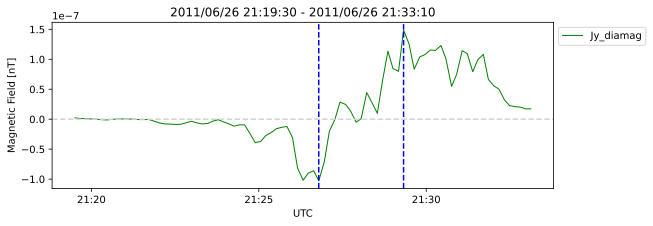

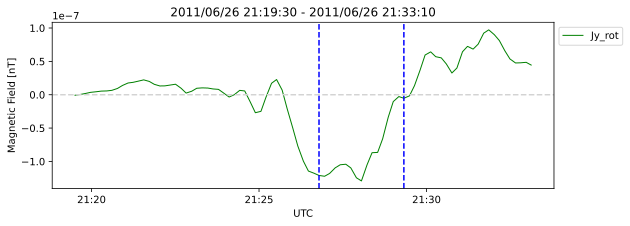

In [10]:
# テストコード
# orbit:199に対してgradPの計算をしてみる
orbit = 201
# orbit = 199
# orbit = 52
data_test = MDUS.ScanData()
data_test.Input(orbit=orbit)
data_test.DataIntegration()
data_test.NTP()
data_test.CalcKTH22(rc=False,ns=False)
data_test.DiamagCurrent()
data_test.rotBCurrent()
data_test.MoveAverage(window=16)
# data_test.value = data_test.value.rolling(16).sum()

ds = MDUS.dip.query('index == @orbit')['start'].values[0]
de = MDUS.dip.query('index == @orbit')['end'].values[0]

dt_max = data_test.value.query('@ds <= index <= @de')["Jy_diamag"].idxmax()
dt_min = data_test.value.query('@ds <= index <= @de')["Jy_diamag"].idxmin()

fig, ax = data_test.PlotMag(component={'P':'red'},ds=ds,de=de)
ax.axvline(dt_max, color='blue', linestyle='dashed')
ax.axvline(dt_min, color='blue', linestyle='dashed')
fig, ax = data_test.PlotMag(component={'Jy_diamag':'green'},ds=ds,de=de)
ax.axvline(dt_max, color='blue', linestyle='dashed')
ax.axvline(dt_min, color='blue', linestyle='dashed')
ax.axhline(0, color='lightgrey', linestyle='dashed')
fig, ax = data_test.PlotMag(component={'Jy_rot':'green'},ds=ds,de=de)
ax.axvline(dt_max, color='blue', linestyle='dashed')
ax.axvline(dt_min, color='blue', linestyle='dashed')
ax.axhline(0, color='lightgrey', linestyle='dashed')

In [9]:
print(data_test.value)

                         19.9492  18.1198  16.4578  14.9482  13.5774  12.3322  \
date                                                                            
2011-06-25 21:16:23.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 21:16:33.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 21:16:42.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 21:16:52.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 21:17:01.424      NaN      NaN      NaN      NaN      NaN      NaN   
...                          ...      ...      ...      ...      ...      ...   
2011-06-25 22:44:57.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 22:45:06.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 22:45:16.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 22:45:25.424      NaN      NaN      NaN      NaN      NaN      NaN   
2011-06-25 22:45:35.424     

In [13]:
data_test.value

,19.9492,18.1198,16.4578,14.9482,13.5774,12.3322,11.2011,10.1738,9.2407,8.393,...,Z_MSO,N,P,T,Jx_diamag,Jy_diamag,Jz_diamag,gradPx,gradPy,gradPz
date,,,,,,,,,,,,,,,,,,,,,
2011-06-25 21:17:39.424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.055621,135.623746,5.868773,3.135685,-4.417353e-07,-1.459482e-07,-2.739927e-07,-1.129423e-14,-2.902441e-14,3.366923e-14
2011-06-25 21:17:49.424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385800.0,438000.0,...,1.059321,168.081793,7.644977,3.295918,7.252397e-07,2.903446e-07,4.867811e-07,1.700437e-14,4.363991e-14,-5.136367e-14
2011-06-25 21:17:58.424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.062615,83.866301,4.992255,4.313504,1.494782e-06,4.245822e-07,8.423673e-07,5.260928e-14,1.348091e-13,-1.613037e-13
2011-06-25 21:18:08.424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.066236,62.541563,4.923632,5.704765,8.073560e-07,-2.053775e-07,9.066476e-08,5.287157e-14,1.352916e-13,-1.643454e-13
2011-06-25 21:18:17.424,0.0,0.0,0.0,193900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.069458,27.473994,2.248588,5.930741,1.731125e-07,-5.228890e-07,-3.683610e-07,7.570643e-14,1.934285e-13,-2.389935e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-06-25 22:43:31.424,0.0,0.0,166700.0,193900.0,224300.0,258400.0,0.0,0.0,385800.0,0.0,...,-2.837196,55.308465,3.333771,4.367823,-1.860282e-04,-1.155849e-06,1.876070e-04,-4.114602e-14,8.549150e-12,1.187167e-14
2011-06-25 22:43:41.424,0.0,0.0,0.0,0.0,224300.0,0.0,0.0,677500.0,0.0,0.0,...,-2.844360,51.073833,2.541204,3.605471,3.304308e-04,9.856873e-07,4.033493e-05,7.572116e-14,-2.448628e-11,-2.193609e-14
2011-06-25 22:43:50.424,121200.0,0.0,0.0,193900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.850798,67.660096,4.061699,4.350068,7.094523e-04,1.380120e-06,-1.459950e-03,1.648040e-13,-1.354468e-10,-4.795528e-14


In [7]:
data_test = MDUS.MagData()
data_test.Input(orbit=199)
data_test.value

,X_MSO,Y_MSO,Z_MSO,Bx,By,Bz,|B|
date,,,,,,,
2011-06-25 21:16:20,1.110545,0.607811,1.024839,57.232,-41.049,-28.441,75.956650
2011-06-25 21:16:21,1.109468,0.607397,1.025242,61.888,-75.316,0.683,97.483798
2011-06-25 21:16:22,1.108390,0.606982,1.025643,43.603,-114.514,-4.146,122.604515
2011-06-25 21:16:23,1.107312,0.606568,1.026045,-4.793,-85.008,-24.141,88.499270
2011-06-25 21:16:24,1.106234,0.606153,1.026446,47.875,-67.082,-20.090,84.826991
...,...,...,...,...,...,...,...
2011-06-25 22:45:34,-1.320434,-0.929617,-2.924175,29.293,13.729,10.719,34.080233
2011-06-25 22:45:35,-1.320221,-0.929613,-2.924877,29.302,18.430,3.084,34.753175
2011-06-25 22:45:36,-1.320007,-0.929610,-2.925579,30.406,16.749,2.241,34.786145


In [9]:
data_test = MDUS.MagData()
data_test.Input(orbit=199)
data_test.value[['Bx','By','Bz','|B|']] = data_test.value[['Bx','By','Bz','|B|']].rolling(16).mean()
data_test.value

,X_MSO,Y_MSO,Z_MSO,Bx,By,Bz,|B|
date,,,,,,,
2011-06-25 21:16:20,1.110545,0.607811,1.024839,NaN,NaN,NaN,NaN
2011-06-25 21:16:21,1.109468,0.607397,1.025242,NaN,NaN,NaN,NaN
2011-06-25 21:16:22,1.108390,0.606982,1.025643,NaN,NaN,NaN,NaN
2011-06-25 21:16:23,1.107312,0.606568,1.026045,NaN,NaN,NaN,NaN
2011-06-25 21:16:24,1.106234,0.606153,1.026446,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2011-06-25 22:45:34,-1.320434,-0.929617,-2.924175,26.749250,9.457500,8.531250,30.054082
2011-06-25 22:45:35,-1.320221,-0.929613,-2.924877,27.468688,10.711188,8.519438,31.090983
2011-06-25 22:45:36,-1.320007,-0.929610,-2.925579,27.816375,11.716437,8.424812,31.694244
